In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

mpl.rcParams['figure.dpi'] = 300

%run backwards_time_voter_model.ipynb

# Run backward voter model

In [31]:
# Set parameters
L = 300
alpha = 3e-3
kernel = 'fat tail'
widths = [4, 16, 32]
eta = -7.2

all_species = []

for i in range(10, 13):
    for W in widths:
        species = voter_model_fast(L, alpha, kernel='fat tail', W=W, eta=eta)
        pickle.dump(species, open(f"{L}x{L},alpha={alpha},kernel=fat_tail,W={W},eta={eta}.p_{i}", "wb" ))

  0%|          | 57/90000 [00:01<34:39, 43.26it/s]


Fill grid for simulated ecosystems

In [7]:
all_grids =[]

# Fill grid for all simulated ecosystems
for species in all_species:
    species_ids = np.random.uniform(size=len(species))

    grid = np.zeros((L, L))
    for i, specie in enumerate(species):
        for coord in specie:
            grid[coord] = species_ids[i]

    all_grids.append(grid)



Plot ecosystem visualization as 2D grid for all model runs

TypeError: 'AxesSubplot' object is not subscriptable

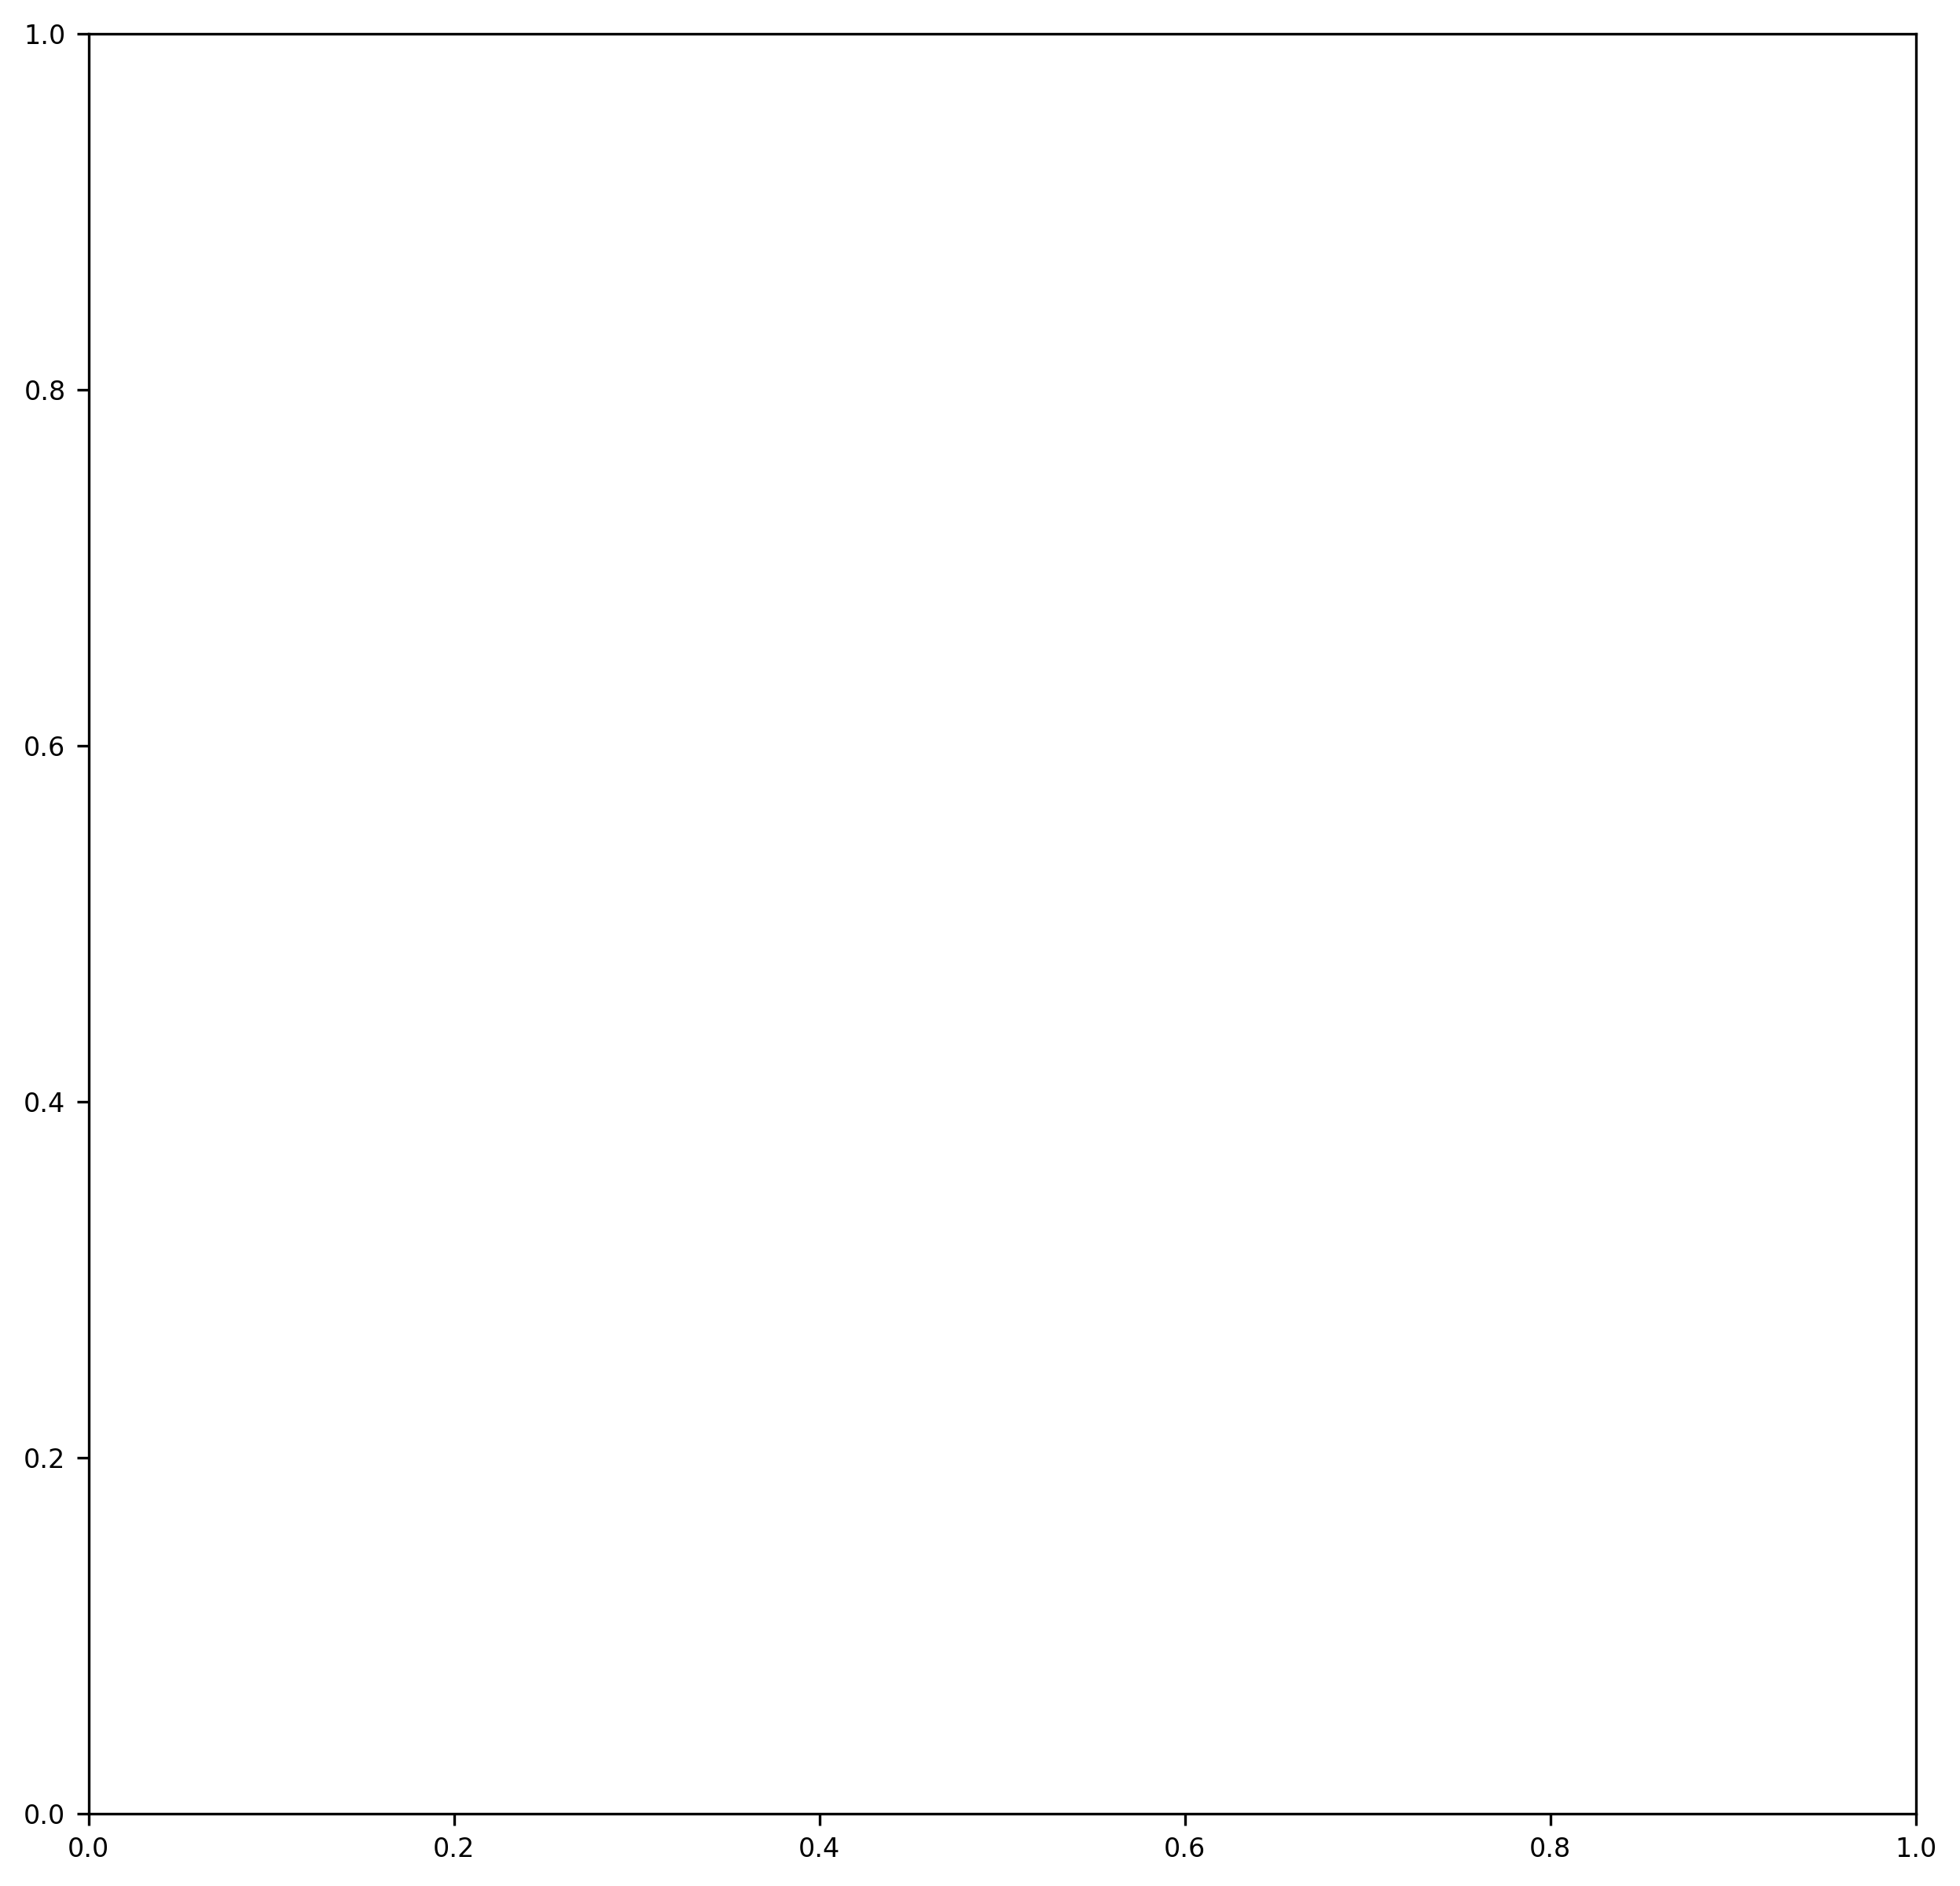

In [9]:
mpl.rc('font', size=8)

fig, axs = plt.subplots(len(widths), 1, figsize = (10,10))

# Plot ecosystems for all widths
for i,width in enumerate(widths):
        axs[i].imshow(all_grids[i])
        axs[i].set_title(f'Grid kernel width={width}', fontsize = 8)
        axs[i].tick_params(axis='x', labelsize=8)
        axs[i].tick_params(axis='y', labelsize=8)
        
plt.show()

Plot Species-Area curve on log-log scale

 
0.2068 x - 0.1029  
0.7125 x - 2.943
 
0.1722 x + 0.05128  
0.8519 x - 4.048


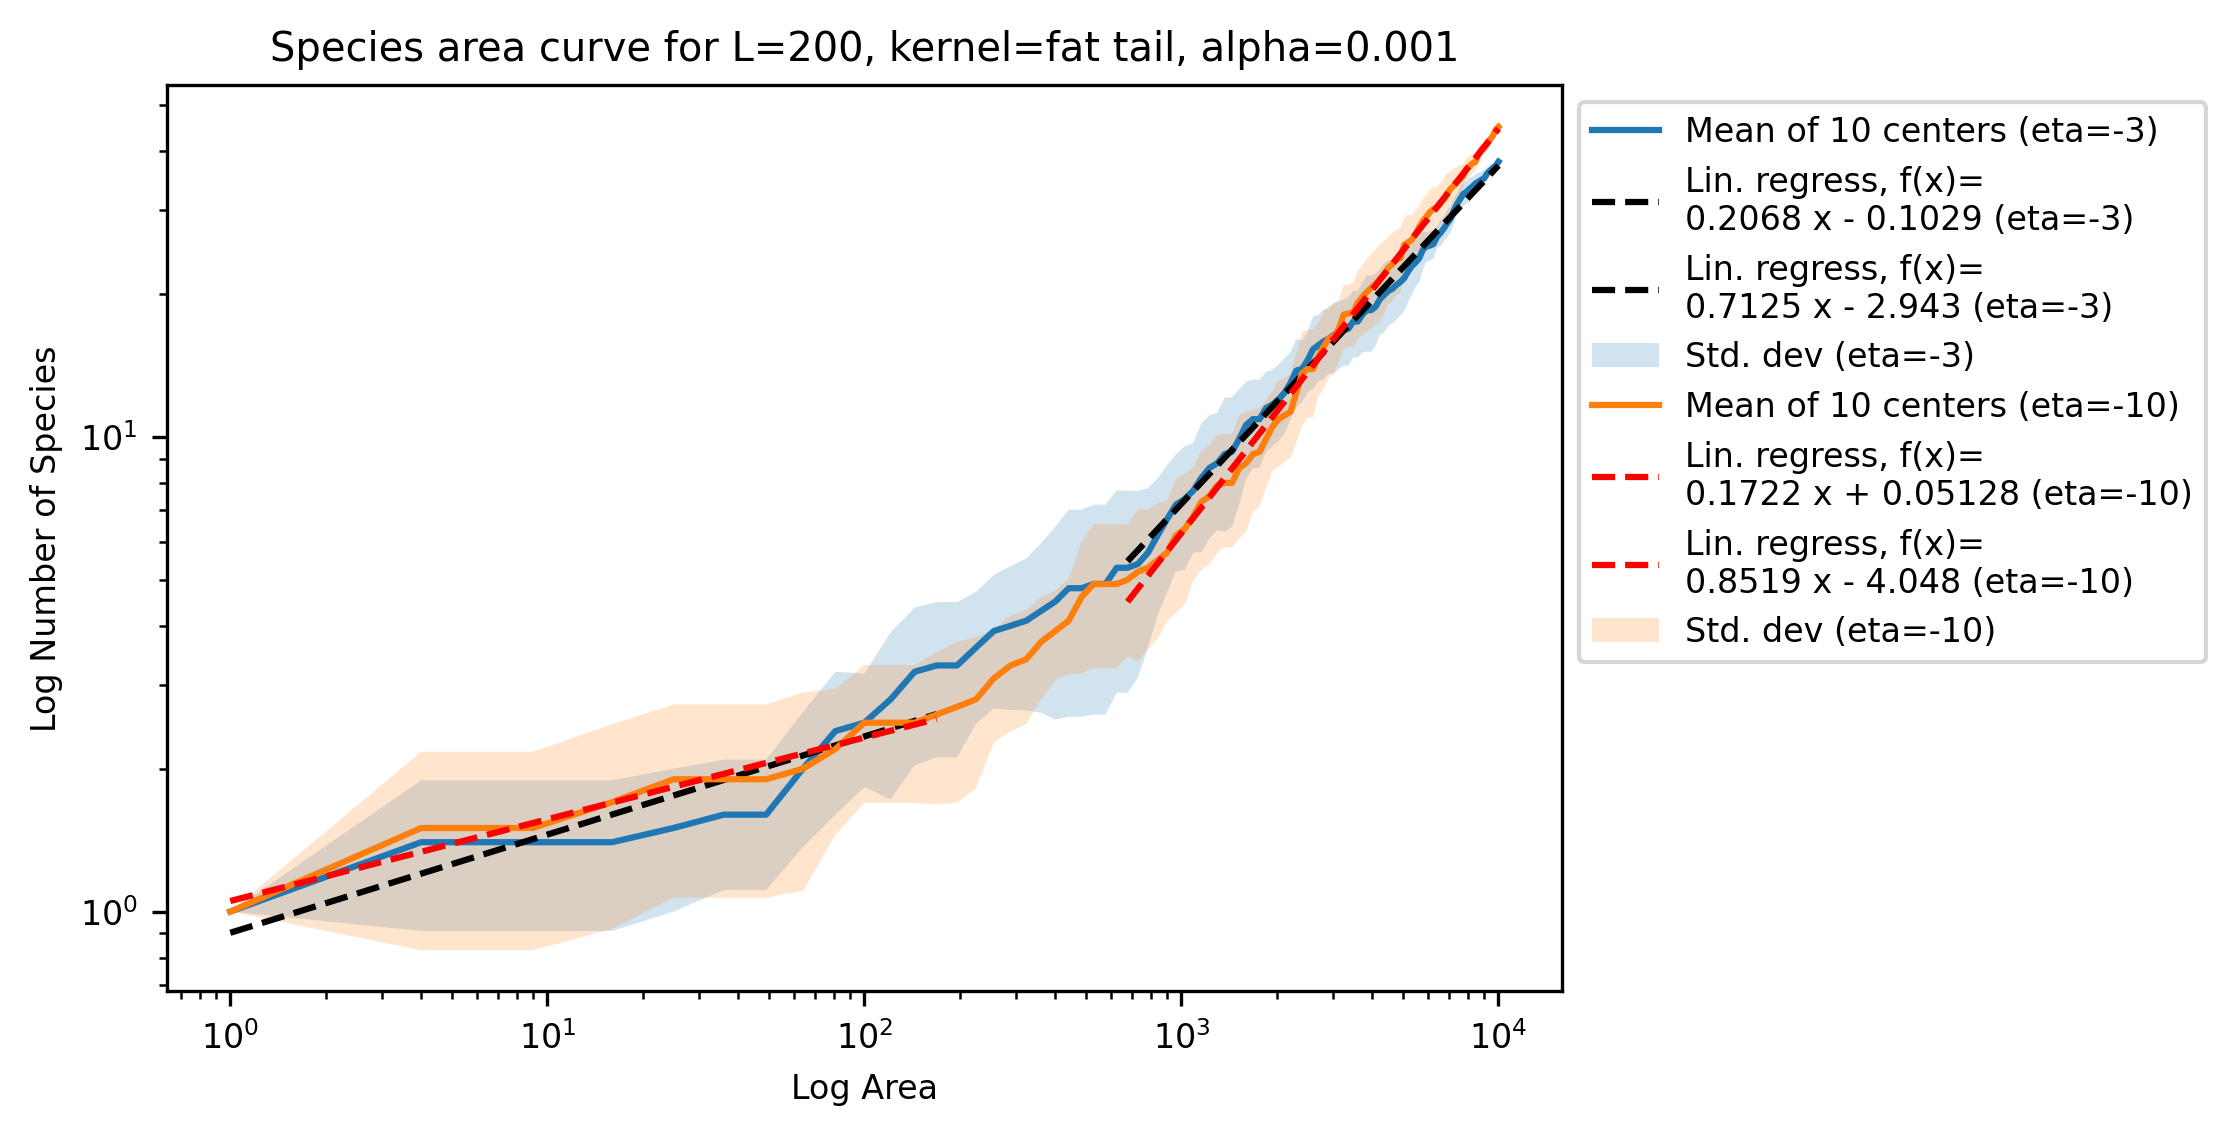

In [ ]:
end_1 = 12
start_2 = 25

color = ['k', 'grey', 'brown']

for i, grid in enumerate(all_grids):
        areas, num_species = sa_curve(grid)
        spec_std_dev = np.std(num_species, axis=0)
        spec_mean = np.mean(num_species, axis=0)

        poly_coeffs1 = np.polyfit(np.log(areas)[:end_1], np.log(spec_mean)[:end_1], 1)
        poly_coeffs2 = np.polyfit(np.log(areas)[start_2:], np.log(spec_mean)[start_2:], 1)
        # poly_coeffs = np.polyfit(np.log(areas), np.log(spec_mean), 1)
        p1 = np.poly1d(poly_coeffs1)
        p2 = np.poly1d(poly_coeffs2)
        print(p1, p2)        

        plt.loglog(areas, list(spec_mean), label=f'Mean of 10 centers (kernel width={widths[i]})')

        plt.loglog([areas[0], areas[end_1]],
                np.exp(poly_coeffs1[1])*np.array([areas[0], areas[end_1]])**poly_coeffs1[0],
                linestyle='dashed',
                color=color[i],
                label=f'Lin. regress, f(x)={p1} (kernel width={widths[i]})')

        plt.loglog([areas[start_2], areas[-1]],
                np.exp(poly_coeffs2[1])*np.array([areas[start_2], areas[-1]])**poly_coeffs2[0],
                linestyle='dashed',
                color=color[i],
                label=f'Lin. regress, f(x)={p2} (kernel width={widths[i]})')
        
        plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label=f'Std. dev (kernel width={widths[i]})')

plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for L={L}, kernel={kernel}, alpha={alpha}, eta={eta}')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Plot Species-Area curve on normal axes

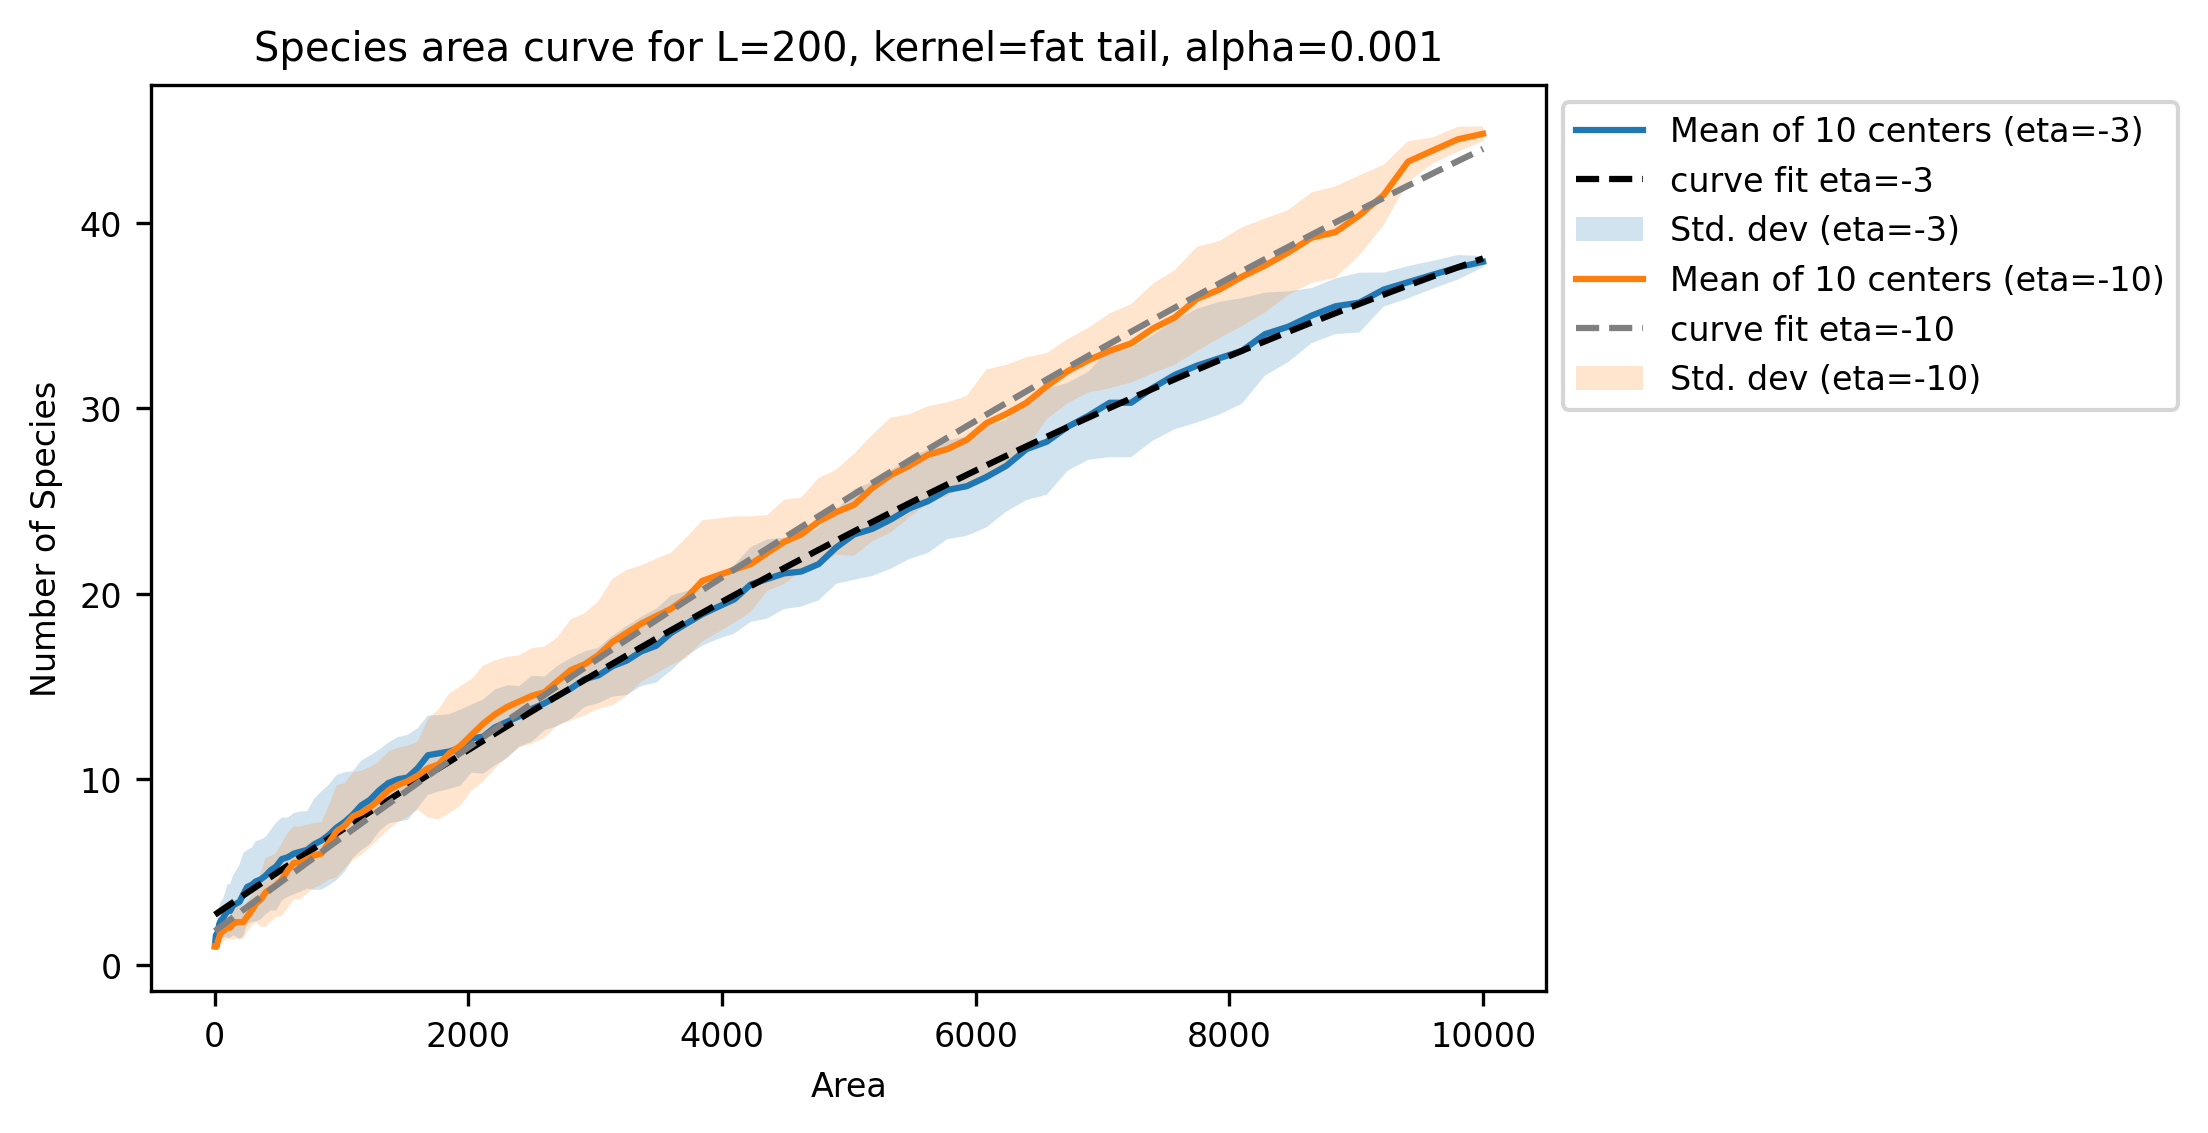

In [ ]:
from scipy.optimize import curve_fit

def model_f(x,a,b,c):
  return a*(x-b)**2+c

color = ['k', 'grey', 'brown']

for i, grid in enumerate(all_grids):
        areas, num_species = sa_curve(grid)
        spec_std_dev = np.std(num_species, axis=0)
        spec_mean = np.mean(num_species, axis=0)

        popt, pcov = curve_fit(model_f, areas, spec_mean, p0=[1,5,-3])

        a_opt, b_opt, c_opt = popt
        x_model = np.linspace(min(areas), max(areas), 100)
        y_model = model_f(x_model, a_opt, b_opt, c_opt) 

        plt.plot(areas, list(spec_mean), label=f'Mean of 10 centers (kernel width={widths[i]})')
        plt.plot(x_model, y_model, color=color[i], linestyle='dashed', label=f'curve fit kernel width={widths[i]}')       
        plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label=f'Std. dev (kernel width={widths[i]})')

plt.ylabel('Number of Species')
plt.xlabel('Area')
plt.title(f'Species area curve for L={L}, kernel={kernel}, alpha={alpha}')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Plot fat tail distributions using kernel function for different values of eta

0.9999999999999992
1.0000000000000002
0.9999999999999998


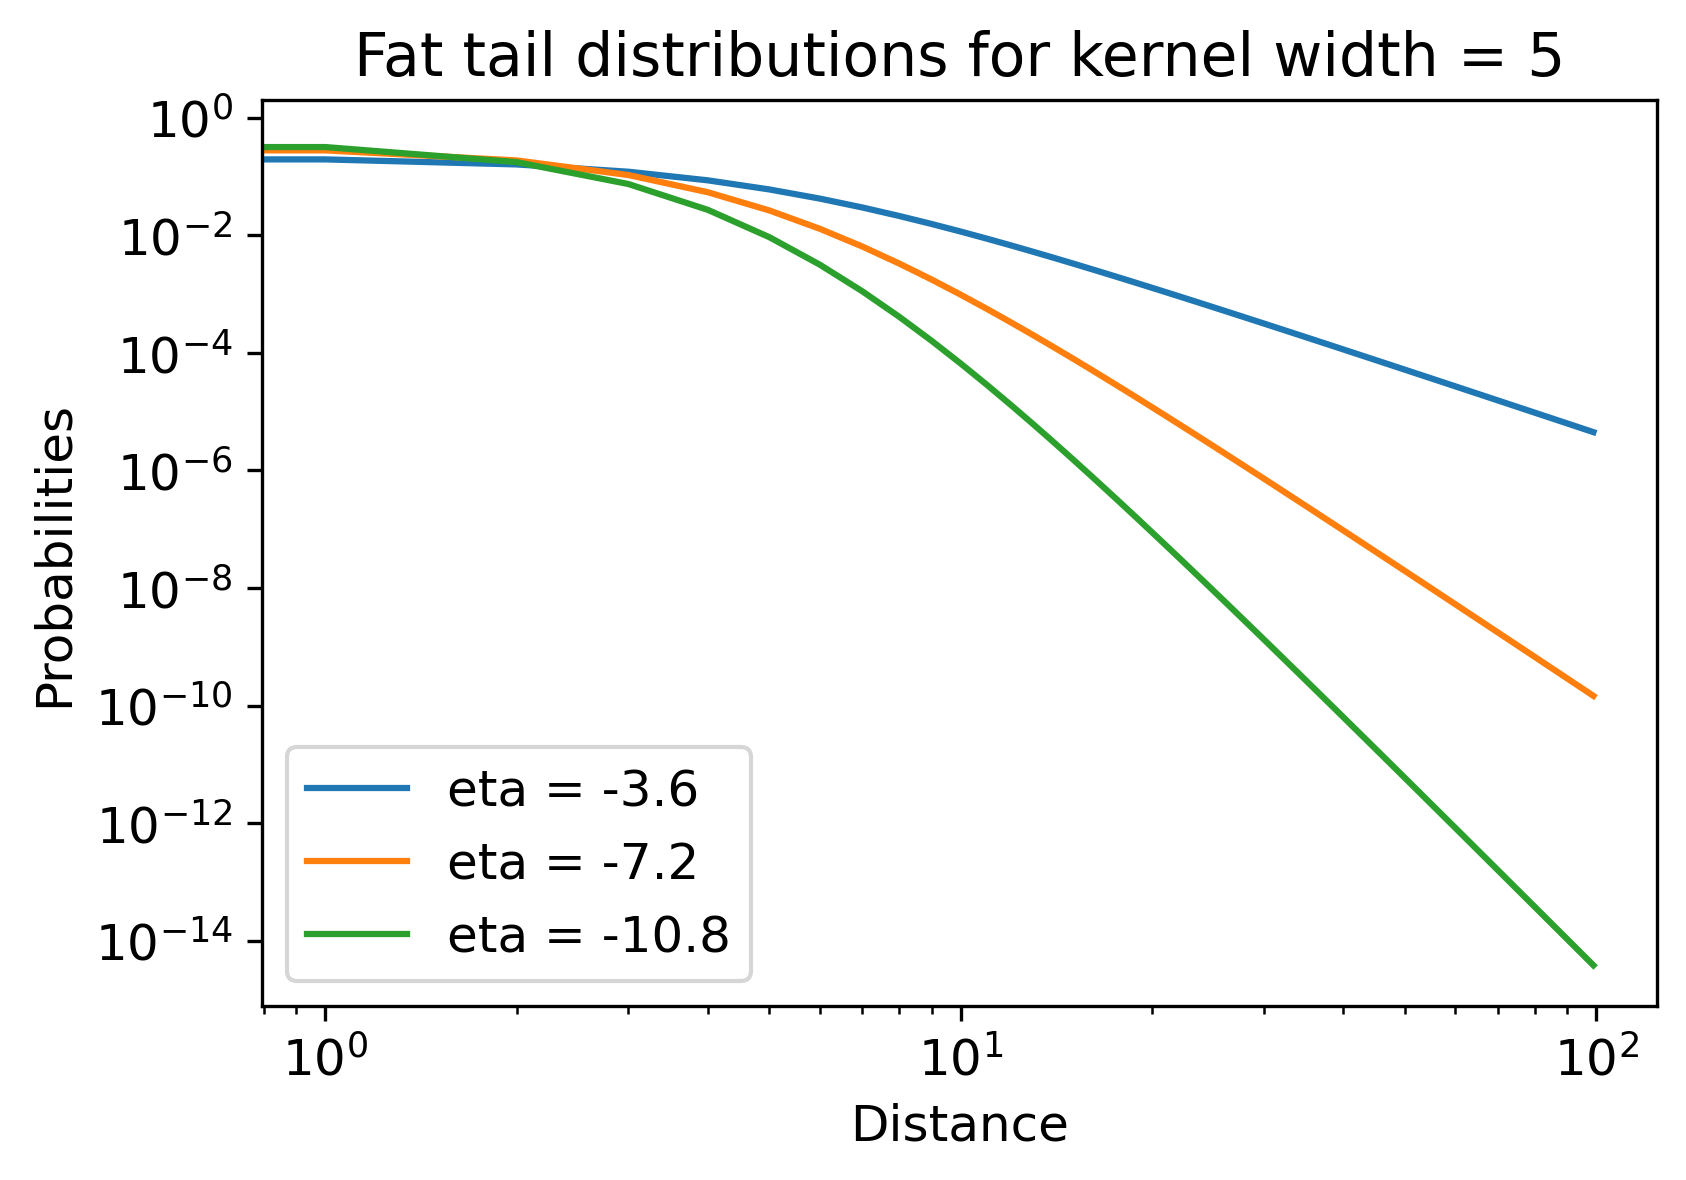

In [ ]:
dist = range(0,100)
etas = [-3.6, -7.2, -10.8]
W = 16

for eta in etas:
    probabilities = []
    for d in dist:
        K = -((eta + 2) / (2 * np.pi * W**2)) * (1 + ((d)/W)**2 )**(eta/2)
        probabilities.append(K)
    probabilities = np.array(probabilities)/sum(probabilities)

    plt.loglog(dist,probabilities,label=f'eta = {eta}')

plt.legend()
plt.xlabel('Distance')
plt.ylabel('Probabilities')
plt.title(f'Fat tail distributions for kernel width = {W}')
plt.show()

Plot fat tail distributions using kernel function for different values of kernel width

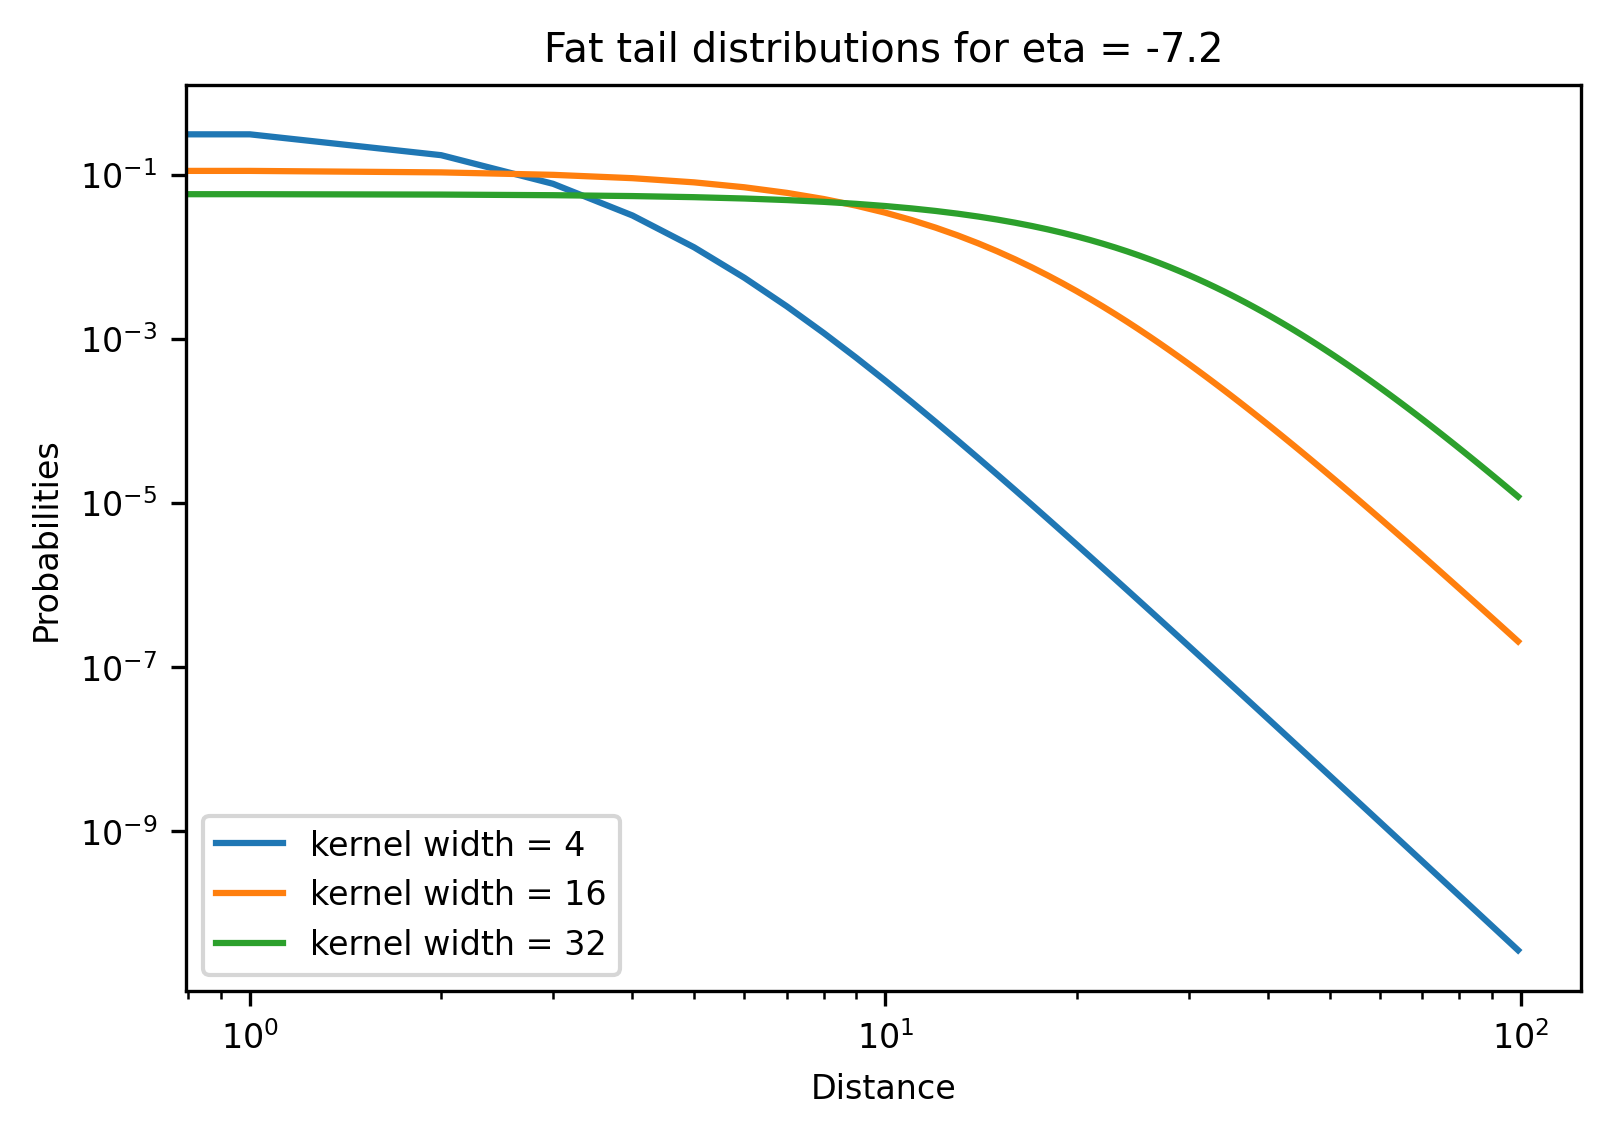

In [26]:
mpl.rc('font', size=8)

dist = range(0,100)
eta = -7.2
width = [4, 16, 32]

for W in width:
    probabilities = []
    for d in dist:
        K = -((eta + 2) / (2 * np.pi * W**2)) * (1 + ((d)/W)**2 )**(eta/2)
        probabilities.append(K)
    probabilities = np.array(probabilities)/sum(probabilities)

    plt.loglog(dist,probabilities,label=f'kernel width = {W}')

plt.legend()
plt.xlabel('Distance')
plt.ylabel('Probabilities')
plt.title(f'Fat tail distributions for eta = {eta}')
plt.show()